# Using Holocene Warming as an Analog for Impacts of Future Warming on the Greenland Ice Sheet and Coastal Communities

Caitlin Locke <br />
Terrestrial Paleoclimate Final Project <br />
Fall 2022 <br />

Team Members: Sam Chester, Emily Glazer, Jaewon Lee, Lauren Lewright  <br />

## Background

Future projections of sea level are important for understanding how vulnerable coastal communities will be affected worldwide. In this project, we evaluated the impact of climate change on coastal communities by using the Holocene Thermal Maximum (HTM) as an analog for future warming, as predicted by Climate Model Intercomparison Project Phase 6 (CMIP6). We examined changes in sea level worldwide due to Greenland Ice Sheet (GrIS) thickness changes through the Holocene using Jacky Austermann’s sea level model and examined our model outputs, along with National Oceanic and Atmospheric Administration (NOAA) tide gauge data.

## 1) Import python libraries and packages.
Import Numpy, Pandas, Matplotlib, Xarray, and Cartopy python libraries and packages. Set the default figure size to (12, 6).

In [1]:
# import Python packages and libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (12,6) # set the default figure size

## 2) Load data from NOAA Tides and Currents website
This dataset contains local relative sea level (RSL) trends based on monthly mean sea level data collected by tide gauges. The tide gauge data for this project are from the National Water Level Observation Network (NWLON), which is a permanent network of water level monitoring stations throughout the United States maintained by NOAA.

In [2]:
# Load data from NOAA Tides and Currents website for Nome, AK (https://tidesandcurrents.noaa.gov/sltrends/sltrends_station.shtml?id=9468756)
url = 'https://tidesandcurrents.noaa.gov/sltrends/data/9468756_meantrend.csv'
df = pd.read_csv(url)
df.head()

# # load data from local file
# file_path = '8518750_meantrend.csv'
# df = pd.read_csv(file_path)
# df.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
1992,10,-0.017,-0.057,-0.012,-0.103,NaN
1993,1,0.122,-0.056,-0.012,-0.101,NaN
1993,2,0.091,-0.056,-0.011,-0.101,NaN
1993,3,0.122,-0.056,-0.011,-0.100,NaN
1993,4,0.068,-0.055,-0.011,-0.100,NaN


# 3) Clean NOAA Tide Data
1. Add DataFrame index
1. Rename column names and drop columns that aren't needed.
1. Change the DataFrame index to Year

In [3]:
# Add dataframe index
df = df.reset_index()
df.head()

,index,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1992,10,-0.017,-0.057,-0.012,-0.103,NaN
1,1993,1,0.122,-0.056,-0.012,-0.101,NaN
2,1993,2,0.091,-0.056,-0.011,-0.101,NaN
3,1993,3,0.122,-0.056,-0.011,-0.100,NaN
4,1993,4,0.068,-0.055,-0.011,-0.100,NaN


In [4]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          314 non-null    int64  
 1   Year           314 non-null    int64  
 2    Month         314 non-null    float64
 3    Monthly_MSL   314 non-null    float64
 4    Linear_Trend  314 non-null    float64
 5    High_Conf.    314 non-null    float64
 6    Low_Conf.     0 non-null      float64
dtypes: float64(5), int64(2)
memory usage: 17.3 KB


In [5]:
# Display dataframe columns
df.columns

Index(['index', 'Year', ' Month', ' Monthly_MSL', ' Linear_Trend',
       ' High_Conf.', ' Low_Conf.'],
      dtype='object')

In [6]:
# Rename column names to shift them to the correct header position
df.rename(columns={'index':'Year',
                       'Year':'Month',
                       ' Month':'Monthly_MSL',
                       ' Monthly_MSL':'Linear_Trend',
                        ' Linear_Trend':'High_Conf',
                        ' High_Conf.':'Low_Conf',
                        ' Low_Conf.':'DELETE'},
               inplace=True)
df.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf,DELETE
0,1992,10,-0.017,-0.057,-0.012,-0.103,NaN
1,1993,1,0.122,-0.056,-0.012,-0.101,NaN
2,1993,2,0.091,-0.056,-0.011,-0.101,NaN
3,1993,3,0.122,-0.056,-0.011,-0.100,NaN
4,1993,4,0.068,-0.055,-0.011,-0.100,NaN


In [7]:
# Drop columns that aren't needed for analysis
df = df.drop(['DELETE'], axis = 1)
df.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf
0,1992,10,-0.017,-0.057,-0.012,-0.103
1,1993,1,0.122,-0.056,-0.012,-0.101
2,1993,2,0.091,-0.056,-0.011,-0.101
3,1993,3,0.122,-0.056,-0.011,-0.100
4,1993,4,0.068,-0.055,-0.011,-0.100


In [8]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          314 non-null    int64  
 1   Month         314 non-null    int64  
 2   Monthly_MSL   314 non-null    float64
 3   Linear_Trend  314 non-null    float64
 4   High_Conf     314 non-null    float64
 5   Low_Conf      314 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 14.8 KB


In [9]:
# Make Year the index
df_yr = df.set_index(['Year'])
df_yr.tail()

,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf
Year,,,,,
2022,6,0.025,0.058,0.098,0.019
2022,7,0.061,0.059,0.098,0.019
2022,8,-0.010,0.059,0.099,0.019
2022,9,0.213,0.059,0.099,0.019
2022,10,0.029,0.060,0.100,0.019


## 4) Plot monthly mean sea level by year for Nome, Alaska

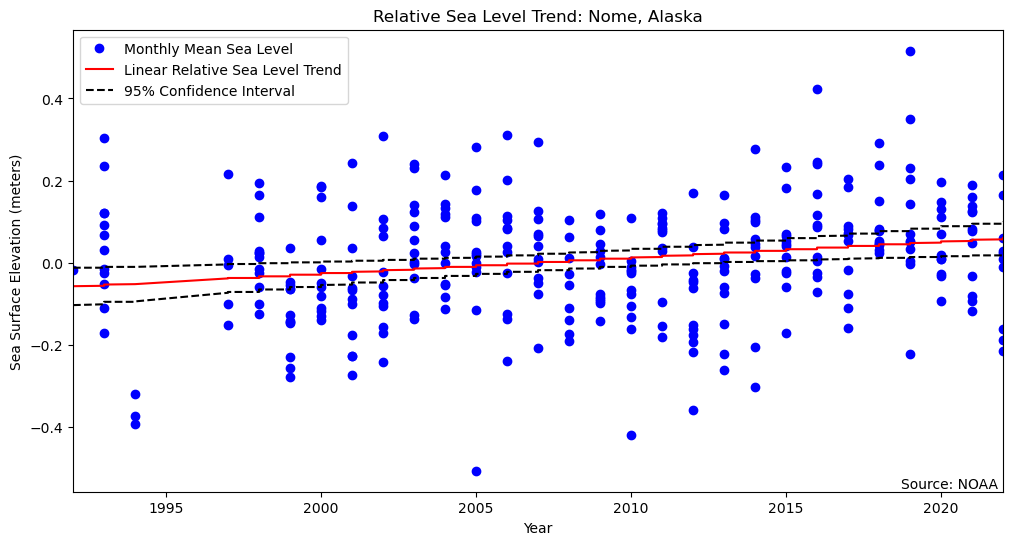

In [10]:
# Plot monthly mean sea level by year
fig, ax = plt.subplots()

df_yr.Monthly_MSL.plot(color='blue', style='o', ax=ax, label='Monthly Mean Sea Level');
df_yr.Linear_Trend.plot(color='red', ax=ax, label='Linear Relative Sea Level Trend');
df_yr.High_Conf.plot(color='black', style='--', ax=ax, label='95% Confidence Interval');
df_yr.Low_Conf.plot(color='black', style='--', ax=ax, label='');
plt.text(2018.7,-0.55,'Source: NOAA')

ax.set_ylabel('Sea Surface Elevation (meters)')
ax.set_title('Relative Sea Level Trend: Nome, Alaska')
ax.margins(x=0)
ax.legend(loc=2);

The relative sea level trend is 3.89 millimeters/year with a 95% confidence
interval of +/- 2.5 mm/yr based on monthly mean sea level data from
1992 to 2021 which is equivalent to a change of 1.28 feet in 100 years. Source: NOAA

## 5) Save figure of monthly mean sea level by year for Nome, Alaska

In [11]:
# Save figure
fig.savefig("RSL_Nome-AK.png", bbox_inches='tight', dpi=600)

## 6) Make a subset DataFrame for 2022

In [12]:
# Make a subset dataframe for 2022
df_2022 = df[df_yr.index == 2022]
df_2022

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf
304,2022,1,-0.214,0.057,0.095,0.018
305,2022,2,-0.161,0.057,0.096,0.018
306,2022,3,-0.189,0.057,0.096,0.018
307,2022,4,0.166,0.058,0.097,0.018
308,2022,5,0.008,0.058,0.097,0.018
309,2022,6,0.025,0.058,0.098,0.019
310,2022,7,0.061,0.059,0.098,0.019
311,2022,8,-0.010,0.059,0.099,0.019
312,2022,9,0.213,0.059,0.099,0.019
313,2022,10,0.029,0.060,0.100,0.019


In [13]:
# Get statistics for 2022 dataframe
df_2022.describe()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf
count,10.0,10.00000,10.000000,10.000000,10.000000,10.000000
mean,2022.0,5.50000,-0.007200,0.058200,0.097500,0.018500
std,0.0,3.02765,0.143448,0.001033,0.001581,0.000527
min,2022.0,1.00000,-0.214000,0.057000,0.095000,0.018000
25%,2022.0,3.25000,-0.123250,0.057250,0.096250,0.018000
50%,2022.0,5.50000,0.016500,0.058000,0.097500,0.018500
75%,2022.0,7.75000,0.053000,0.059000,0.098750,0.019000
max,2022.0,10.00000,0.213000,0.060000,0.100000,0.019000


## 7) Compute montly mean sea level in 2022 in meters and millimeters from subset 2022 DataFrame

In [14]:
# Montly mean sea level in 2022 in meters
msl2022_m = df_2022.Monthly_MSL.mean()
msl2022_m

-0.007200000000000007

In [15]:
# Montly mean sea level in 2022 in millimeters
msl2022_mm = msl2022_m * 1000
msl2022_mm 

-7.200000000000006

## 8) Calculate sea level change rates for each temperature scenario in millimeters and meters

In [16]:
# Calculate sea level change rates for 85 year difference (2015-2100) in millimeters

# 9.71 K (1)
SLC_NY_1_mm = 0.7767/85*1000
SLC_Nome_1_mm = 1.7740/85*1000
SLC_Yakutat_1_mm = 1.5582/85*1000
print(SLC_Nome_1_mm)

# 13.91 K (2)
SLC_NY_2_mm = 0.8325/85*1000
SLC_Nome_2_mm = 1.8330/85*1000
SLC_Yakutat_1_mm = 1.6141/85*1000
print(SLC_Nome_2_mm)

# 6.33 K (3)
SLC_NY_3_mm = 0.7279/85*1000
SLC_Nome_3_mm = 1.6649/85*1000
SLC_Yakutat_1_mm = 1.4638/85*1000
print(SLC_Nome_3_mm)

20.870588235294118
21.56470588235294
19.58705882352941


## Calculated Sea Level Change Rates from Greenland Ice Sheet (GrIS) melt, 2022-2100, in different CMIP6 Temperature Projections
For the mean, 95th percentile, and 5th percentile projected temperature changes, a time window from the Holocene is determined that has a similar temperature increase to each CMIP6 projection. The magnitude of the sea level change was calculated for each of these time windows in our locations of interest, and a rate of sea level rise was computed for each temperature scenario by dividing the magnitude for each temperature scenario by 85 years (the time period used in the CMIP6 projections).

| CMIP6 SSP5-8.5 | Corresponding Holocene time interval | New York, NY | Nome, AK |
| --- | --- | --- | --- |
| Mean of projected warming, 9.71 K | 11.5 - 8 ka | 9.14 mm/yr | 20.87 mm/yr |
| 95th percentile of projected warming, 13.91 K | 12 - 7.5 ka | 9.79 mm/yr | 21.56 mm/yr |
| 5th percentile of projected warming, 6.33 K | 11 - 8 ka | 8.56 mm/yr |  19.59 mm/yr |


## Sea level change rate between 11.5 and 8 ka (9.71 K):
- NY: 9.14 mm/yr
- Nome: 20.87 mm/yr
- Yakutat: 18.33 mm/yr

## Sea level change rate between 12 and 7.5 ka (13.91 K):
- NY: 9.79 mm/yr
- Nome: 21.56 mm/yr
- Yakutat: 18.99 mm/yr

## Sea level change rate between 11 and 8 ka (6.33 K):
- NY: 8.56 mm/yr
- Nome: 19.59 mm/yr
- Yakutat: 17.22 mm/yr

In [17]:
# Calculate sea level change rates for 85 year difference (2015-2100) in meters

# 9.71 K (1)
#SLC_Nome_1_mm = 23.65 #mm/yr #wrong 75 yrs instead of 85 yrs
SLC_Nome_1_m = SLC_Nome_1_mm/1000
print(SLC_Nome_1_m)

# 13.91 K (2)
#SLC_Nome_2_mm = 24.44 #mm/yr #wrong 75 yrs instead of 85 yrs
SLC_Nome_2_m = SLC_Nome_2_mm/1000
print(SLC_Nome_2_m)

# 6.33 K (3)
#SLC_Nome_3_mm = 22.199 #mm/yr #wrong 75 yrs instead of 85 yrs
SLC_Nome_3_m = SLC_Nome_3_mm/1000
print(SLC_Nome_3_m)

0.020870588235294116
0.02156470588235294
0.019587058823529412


## 9) Calculate sea level change from 2022 to 2100 in meters and feet for each temperature scenario

In [18]:
# Calculate number of years to 2100
yr_min = df.iloc[df.index.min()].Year
yr_max = df.iloc[df.index.max()].Year

del_yr = 2100 - yr_max
del_yr

78.0

In [19]:
# Display max year
yr_max = df.iloc[df.index.max()].Year
yr_max

2022.0

In [20]:
# Sea level change 2022 to 2100 (1) in m
SLC_1_mm = del_yr * SLC_Nome_1_mm
SLC_1_m = SLC_1_mm /1000
SLC_1_m

1.6279058823529413

In [21]:
# Sea level change 2022 to 2100 (1) in ft
SLC_1_ft = SLC_1_m * 3.281
SLC_1_ft

5.341159200000001

In [22]:
# Sea level change 2022 to 2100 (2) in m
SLC_2_mm = del_yr * SLC_Nome_2_mm
SLC_2_m = SLC_2_mm /1000
SLC_2_m

1.6820470588235295

In [23]:
# Sea level change 2022 to 2100 (2) in ft
SLC_2_ft = SLC_2_m * 3.281
SLC_2_ft

5.5187964

In [24]:
# Sea level change 2022 to 2100 (3) in m
SLC_3_mm = del_yr * SLC_Nome_3_mm
SLC_3_m = SLC_3_mm /1000
SLC_3_m

1.527790588235294

In [25]:
# Sea level change 2022 to 2100 (3) in ft
SLC_3_ft = SLC_3_m * 3.281
SLC_3_ft

5.01268092

## 10) Calculate projected sea level in 2100 in meters and feet for each temperature scenario based on our calculated sea level change rates

In [26]:
# Calculate 2100 sea level for scenario 1 in m
SL_2100_1 = msl2022_m + SLC_1_m
SL_2100_1

1.6207058823529412

In [27]:
# Calculate 2100 sea level for scenario 1 in ft
SL_2100_1_ft = SL_2100_1 * 3.281
SL_2100_1_ft

5.3175360000000005

In [28]:
# Calculate 2100 sea level for scenario 2 in m
SL_2100_2 = msl2022_m + SLC_2_m
SL_2100_2

1.6748470588235294

In [29]:
# Calculate 2100 sea level for scenario 2 in ft
SL_2100_2_ft = SL_2100_2 * 3.281
SL_2100_2_ft

5.4951732

In [30]:
# Calculate 2100 sea level for scenario 3 in m
SL_2100_3 = msl2022_m + SLC_3_m
SL_2100_3

1.520590588235294

In [31]:
# Calculate 2100 sea level for scenario 3 in ft
SL_2100_3_ft = SL_2100_3 * 3.281
SL_2100_3_ft

4.98905772

## 11) Make arrays of years from 2022 to 2100

In [32]:
# Make array of years from 2022 to 2100
proj_yrs = np.linspace(2022, 2100, 79)
proj_yrs

array([2022., 2023., 2024., 2025., 2026., 2027., 2028., 2029., 2030.,
       2031., 2032., 2033., 2034., 2035., 2036., 2037., 2038., 2039.,
       2040., 2041., 2042., 2043., 2044., 2045., 2046., 2047., 2048.,
       2049., 2050., 2051., 2052., 2053., 2054., 2055., 2056., 2057.,
       2058., 2059., 2060., 2061., 2062., 2063., 2064., 2065., 2066.,
       2067., 2068., 2069., 2070., 2071., 2072., 2073., 2074., 2075.,
       2076., 2077., 2078., 2079., 2080., 2081., 2082., 2083., 2084.,
       2085., 2086., 2087., 2088., 2089., 2090., 2091., 2092., 2093.,
       2094., 2095., 2096., 2097., 2098., 2099., 2100.])

## 12) Make arrays of sea level change from 2022 to 2100 in meters for each temperature scenario

In [33]:
# Make array of SLC from 2022 to 2100 for scenario 1
proj_1_slc = np.linspace(msl2022_m, SL_2100_1, 79)
proj_1_slc

array([-0.0072    ,  0.01367059,  0.03454118,  0.05541176,  0.07628235,
        0.09715294,  0.11802353,  0.13889412,  0.15976471,  0.18063529,
        0.20150588,  0.22237647,  0.24324706,  0.26411765,  0.28498824,
        0.30585882,  0.32672941,  0.3476    ,  0.36847059,  0.38934118,
        0.41021176,  0.43108235,  0.45195294,  0.47282353,  0.49369412,
        0.51456471,  0.53543529,  0.55630588,  0.57717647,  0.59804706,
        0.61891765,  0.63978824,  0.66065882,  0.68152941,  0.7024    ,
        0.72327059,  0.74414118,  0.76501176,  0.78588235,  0.80675294,
        0.82762353,  0.84849412,  0.86936471,  0.89023529,  0.91110588,
        0.93197647,  0.95284706,  0.97371765,  0.99458824,  1.01545882,
        1.03632941,  1.0572    ,  1.07807059,  1.09894118,  1.11981176,
        1.14068235,  1.16155294,  1.18242353,  1.20329412,  1.22416471,
        1.24503529,  1.26590588,  1.28677647,  1.30764706,  1.32851765,
        1.34938824,  1.37025882,  1.39112941,  1.412     ,  1.43

In [34]:
# Make array of SLC from 2022 to 2100 for scenario 2
proj_2_slc = np.linspace(msl2022_m, SL_2100_2, 79)
proj_2_slc

array([-0.0072    ,  0.01436471,  0.03592941,  0.05749412,  0.07905882,
        0.10062353,  0.12218824,  0.14375294,  0.16531765,  0.18688235,
        0.20844706,  0.23001176,  0.25157647,  0.27314118,  0.29470588,
        0.31627059,  0.33783529,  0.3594    ,  0.38096471,  0.40252941,
        0.42409412,  0.44565882,  0.46722353,  0.48878824,  0.51035294,
        0.53191765,  0.55348235,  0.57504706,  0.59661176,  0.61817647,
        0.63974118,  0.66130588,  0.68287059,  0.70443529,  0.726     ,
        0.74756471,  0.76912941,  0.79069412,  0.81225882,  0.83382353,
        0.85538824,  0.87695294,  0.89851765,  0.92008235,  0.94164706,
        0.96321176,  0.98477647,  1.00634118,  1.02790588,  1.04947059,
        1.07103529,  1.0926    ,  1.11416471,  1.13572941,  1.15729412,
        1.17885882,  1.20042353,  1.22198824,  1.24355294,  1.26511765,
        1.28668235,  1.30824706,  1.32981176,  1.35137647,  1.37294118,
        1.39450588,  1.41607059,  1.43763529,  1.4592    ,  1.48

In [35]:
# Make array of SLC from 2022 to 2100 for scenario 3
proj_3_slc = np.linspace(msl2022_m, SL_2100_3, 79)
proj_3_slc

array([-0.0072    ,  0.01238706,  0.03197412,  0.05156118,  0.07114824,
        0.09073529,  0.11032235,  0.12990941,  0.14949647,  0.16908353,
        0.18867059,  0.20825765,  0.22784471,  0.24743176,  0.26701882,
        0.28660588,  0.30619294,  0.32578   ,  0.34536706,  0.36495412,
        0.38454118,  0.40412824,  0.42371529,  0.44330235,  0.46288941,
        0.48247647,  0.50206353,  0.52165059,  0.54123765,  0.56082471,
        0.58041176,  0.59999882,  0.61958588,  0.63917294,  0.65876   ,
        0.67834706,  0.69793412,  0.71752118,  0.73710824,  0.75669529,
        0.77628235,  0.79586941,  0.81545647,  0.83504353,  0.85463059,
        0.87421765,  0.89380471,  0.91339176,  0.93297882,  0.95256588,
        0.97215294,  0.99174   ,  1.01132706,  1.03091412,  1.05050118,
        1.07008824,  1.08967529,  1.10926235,  1.12884941,  1.14843647,
        1.16802353,  1.18761059,  1.20719765,  1.22678471,  1.24637176,
        1.26595882,  1.28554588,  1.30513294,  1.32472   ,  1.34

## 13) Plot monthly mean sea level by year with projected relative sea level change from GrIS for Nome, Alaska

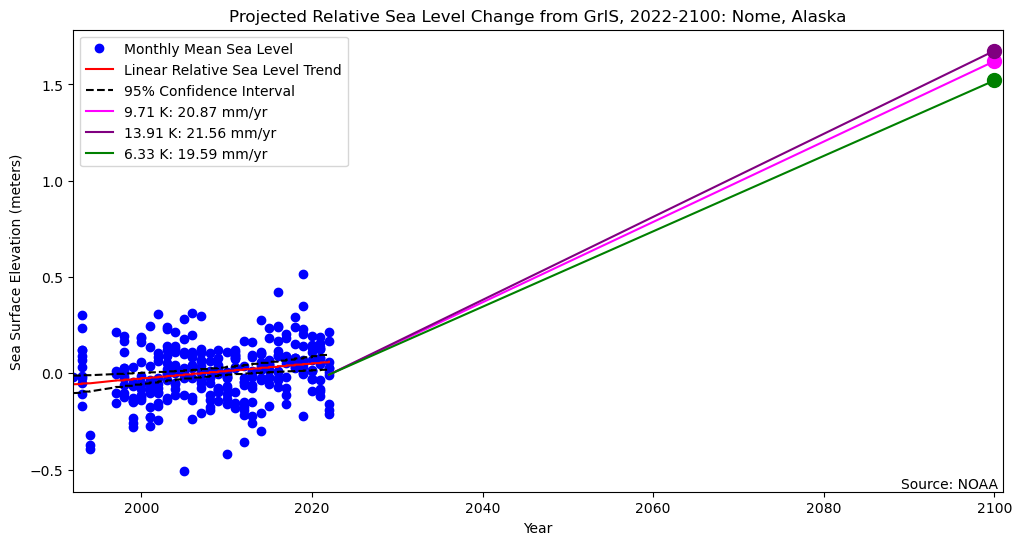

In [36]:
# Plot monthly mean sea level by year with projected relative sea level change from GrIS for Nome, AK
fig, ax = plt.subplots()

df_yr.Monthly_MSL.plot(color='blue', style='o', ax=ax, label='Monthly Mean Sea Level');
df_yr.Linear_Trend.plot(color='red', ax=ax, label='Linear Relative Sea Level Trend');
df_yr.High_Conf.plot(color='black', style='--', ax=ax, label='95% Confidence Interval');
df_yr.Low_Conf.plot(color='black', style='--', ax=ax, label='');

ax.set_ylabel('Sea Surface Elevation (meters)')
ax.set_title('Relative Sea Level Trend: Nome, Alaska')
ax.margins(x=0)
ax.legend(loc=2);

ax.plot(proj_yrs, proj_1_slc, color='magenta', label='9.71 K: 20.87 mm/yr')
ax.plot(proj_yrs, proj_2_slc, color='purple', label='13.91 K: 21.56 mm/yr')
ax.plot(proj_yrs, proj_3_slc, color='green', label='6.33 K: 19.59 mm/yr')

ax.plot(proj_yrs[78], proj_1_slc[78], 'o', markersize=10, color='magenta', label='')
ax.plot(proj_yrs[78], proj_2_slc[78], 'o', markersize=10, color='purple', label='')
ax.plot(proj_yrs[78], proj_3_slc[78], 'o', markersize=10, color='green', label='')

plt.text(2089,-0.6,'Source: NOAA')

ax.set_ylabel('Sea Surface Elevation (meters)')
ax.set_title('Projected Relative Sea Level Change from GrIS, 2022-2100: Nome, Alaska')
ax.set_xlim(1992, 2101)
ax.margins(x=0)
ax.legend(loc=2);

## 14) Save figure of monthly mean sea level by year for Nome, Alaska with projected relative sea level change from GrIS

In [37]:
# Save figure
fig.savefig("SLC_2100_Nome-AK.png", bbox_inches='tight', dpi=600)

## 15) Plot projected relative sea level change from GrIS for Nome, Alaska

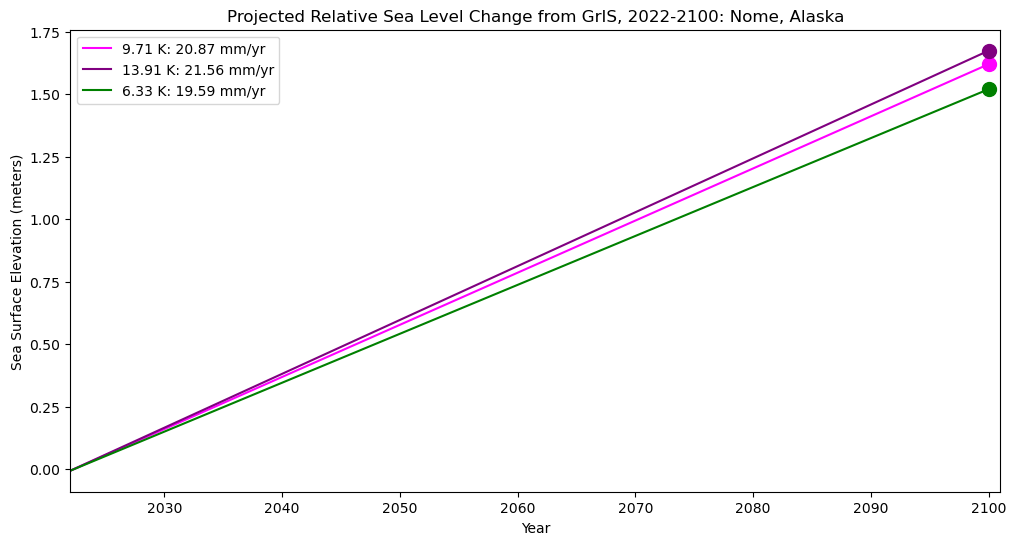

In [38]:
# Plot projected relative sea level change from GrIS for Nome, Alaska
fig, ax = plt.subplots()

ax.plot(proj_yrs, proj_1_slc, color='magenta', label='9.71 K: 20.87 mm/yr')
ax.plot(proj_yrs, proj_2_slc, color='purple', label='13.91 K: 21.56 mm/yr')
ax.plot(proj_yrs, proj_3_slc, color='green', label='6.33 K: 19.59 mm/yr')

ax.plot(proj_yrs[78], proj_1_slc[78], 'o', markersize=10, color='magenta', label='')
ax.plot(proj_yrs[78], proj_2_slc[78], 'o', markersize=10, color='purple', label='')
ax.plot(proj_yrs[78], proj_3_slc[78], 'o', markersize=10, color='green', label='')

ax.set_ylabel('Sea Surface Elevation (meters)')
ax.set_xlabel('Year')
ax.set_title('Projected Relative Sea Level Change from GrIS, 2022-2100: Nome, Alaska')
ax.set_xlim(2022, 2101)
ax.margins(x=0)
ax.legend(loc=2);

## 16) Save figure of projected relative sea level change from GrIS for Nome, Alaska

In [39]:
# Save figure
fig.savefig("SLC_2022-2100_Nome-AK.png", bbox_inches='tight', dpi=600)